# Task F - Comparison and benchmark: Jerk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fireworks.ic as fic
import fireworks.nbodylib.dynamics as dyn
import pytest
from numpy.random import seed
import time

In [2]:
seed(42)
N           = np.arange(2,150)
pos_min     = -2
pos_max     = 2
vel_min     = -10
vel_max     = 10
mass_min    = 0
mass_max    = 200

In [3]:
time_direct = []

for i in range(len(N)):
    part = fic.ic_random_uniform(N[i], pos_min, pos_max, vel_min, vel_max, mass_min, mass_max)  

    #acceleration direct
    t1              = time.perf_counter()
    acc, jerk, _    = dyn.acceleration_jerk_direct(part)
    t2              = time.perf_counter()
    dt              = t2 - t1
    print(f"time required to run the acceleration jerk direct function for N = {N[i]}: ", dt)
    time_direct.append(dt)

    print("")
    

time required to run the acceleration jerk direct function for N = 2:  0.004571966943331063

time required to run the acceleration jerk direct function for N = 3:  0.0022835429990664124

time required to run the acceleration jerk direct function for N = 4:  0.0005152210360392928

time required to run the acceleration jerk direct function for N = 5:  0.0014203980099409819

time required to run the acceleration jerk direct function for N = 6:  0.004333944991230965

time required to run the acceleration jerk direct function for N = 7:  0.004561519017443061

time required to run the acceleration jerk direct function for N = 8:  0.0029533610213547945

time required to run the acceleration jerk direct function for N = 9:  0.003767860005609691

time required to run the acceleration jerk direct function for N = 10:  0.004323382978327572

time required to run the acceleration jerk direct function for N = 11:  0.005840003956109285

time required to run the acceleration jerk direct function for N

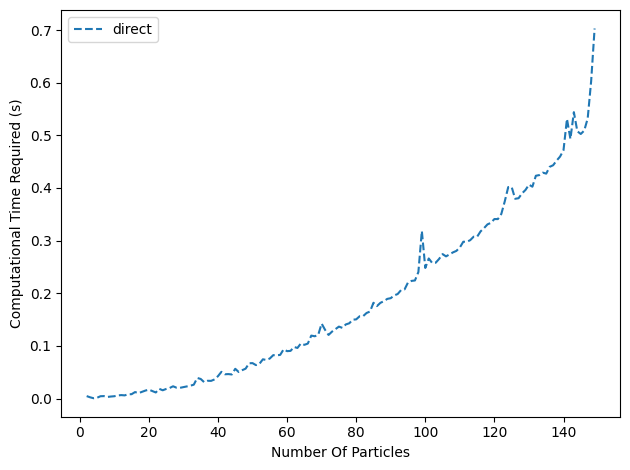

In [4]:
plt.plot(N, time_direct, label='direct', linestyle='dashed')
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required (s)')
plt.legend()
plt.tight_layout()
plt.show()

As expected we obtain a powerlaw since inside the function `acceleration_jerk_direct` we have 2 for cycles ($N^2$).